In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../artifacts/raw/dataa.csv')

In [5]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  \
0  2024-01-01 00:00:00          39           Idle      74.137590   
1  2024-01-01 00:01:00          29         Active      84.264558   
2  2024-01-01 00:02:00          15         Active      44.280102   
3  2024-01-01 00:03:00          43         Active      40.568502   
4  2024-01-01 00:04:00           8           Idle      75.063817   

   Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0      3.500595              8.612162           10.650542       0.207764   
1      3.355928              2.268559           29.111810       2.228464   
2      2.079766              6.144105           18.357292       1.639416   
3      0.298238              4.067825           29.153629       1.161021   
4      0.345810              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [6]:
df.shape

(100000, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      100000 non-null  object 
 1   Machine_ID                     100000 non-null  int64  
 2   Operation_Mode                 100000 non-null  object 
 3   Temperature_C                  100000 non-null  float64
 4   Vibration_Hz                   100000 non-null  float64
 5   Power_Consumption_kW           100000 non-null  float64
 6   Network_Latency_ms             100000 non-null  float64
 7   Packet_Loss_%                  100000 non-null  float64
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64
 9   Production_Speed_units_per_hr  100000 non-null  float64
 10  Predictive_Maintenance_Score   100000 non-null  float64
 11  Error_Rate_%                   100000 non-null  float64
 12  Efficiency_Status              

#### Data processing

In [10]:
df["Timestamp"] = pd.to_datetime(df.Timestamp, errors='coerce')

In [11]:
df.Timestamp.dtype

dtype('<M8[ns]')

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
categorical_cols =['Operation_Mode','Efficiency_Status']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [14]:
df.Operation_Mode.dtype, df.Efficiency_Status.dtype

(CategoricalDtype(categories=['Active', 'Idle', 'Maintenance'], ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['High', 'Low', 'Medium'], ordered=False, categories_dtype=object))

### EDA

In [15]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

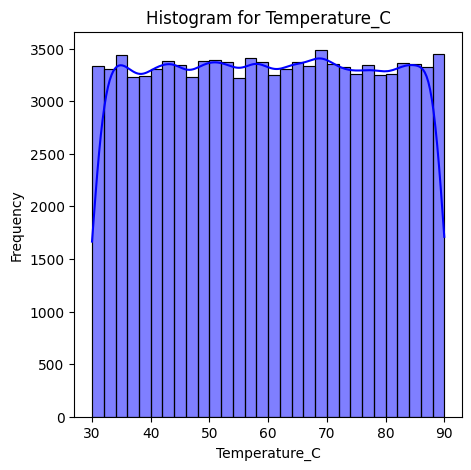

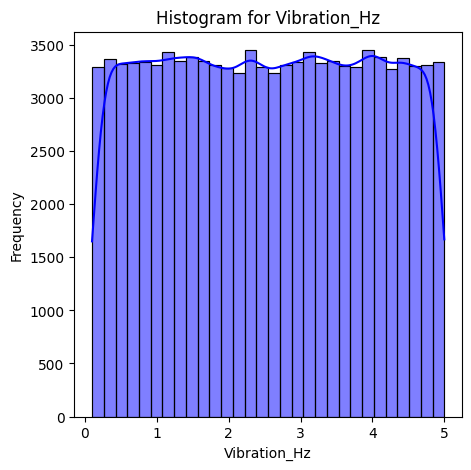

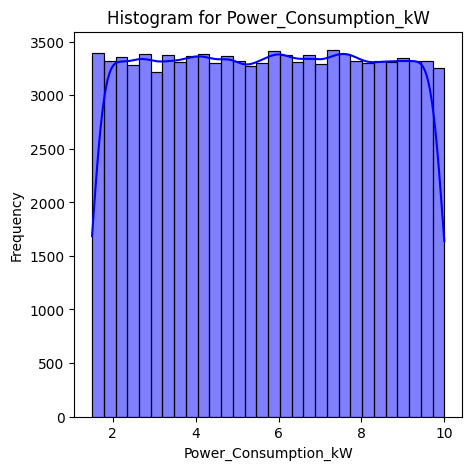

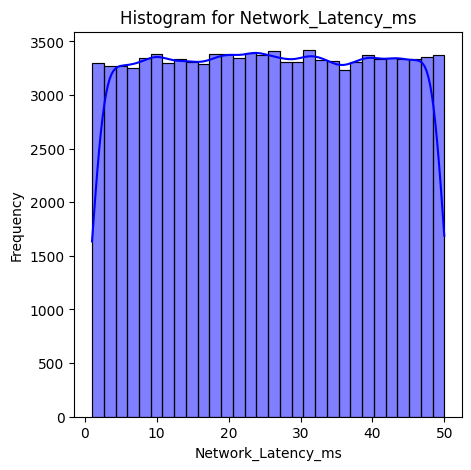

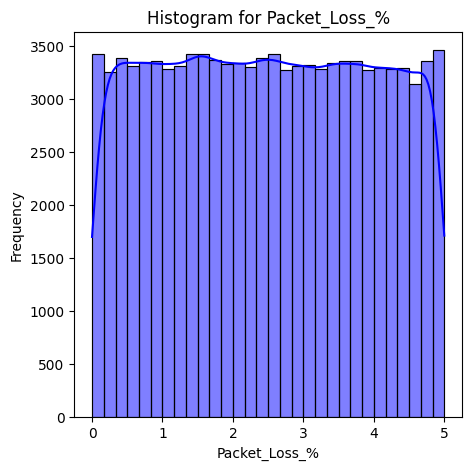

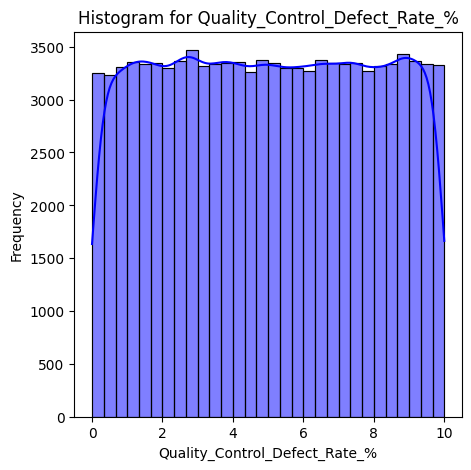

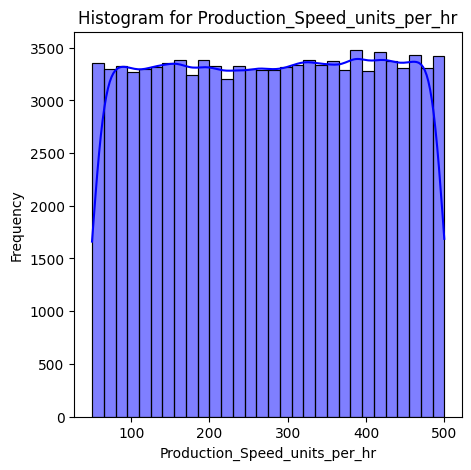

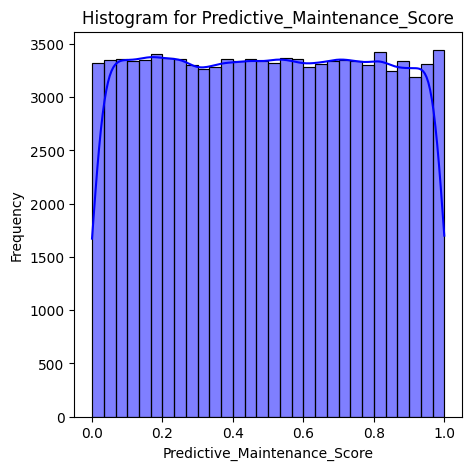

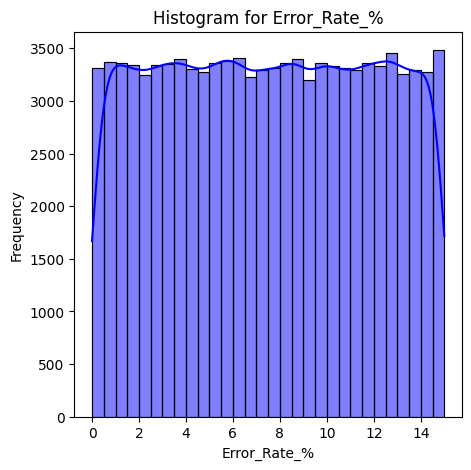

In [19]:
for col in numeric_cols:
    if col not in ['Machine_ID']:
        plt.figure(figsize=(5,5))
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f"Histogram for {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

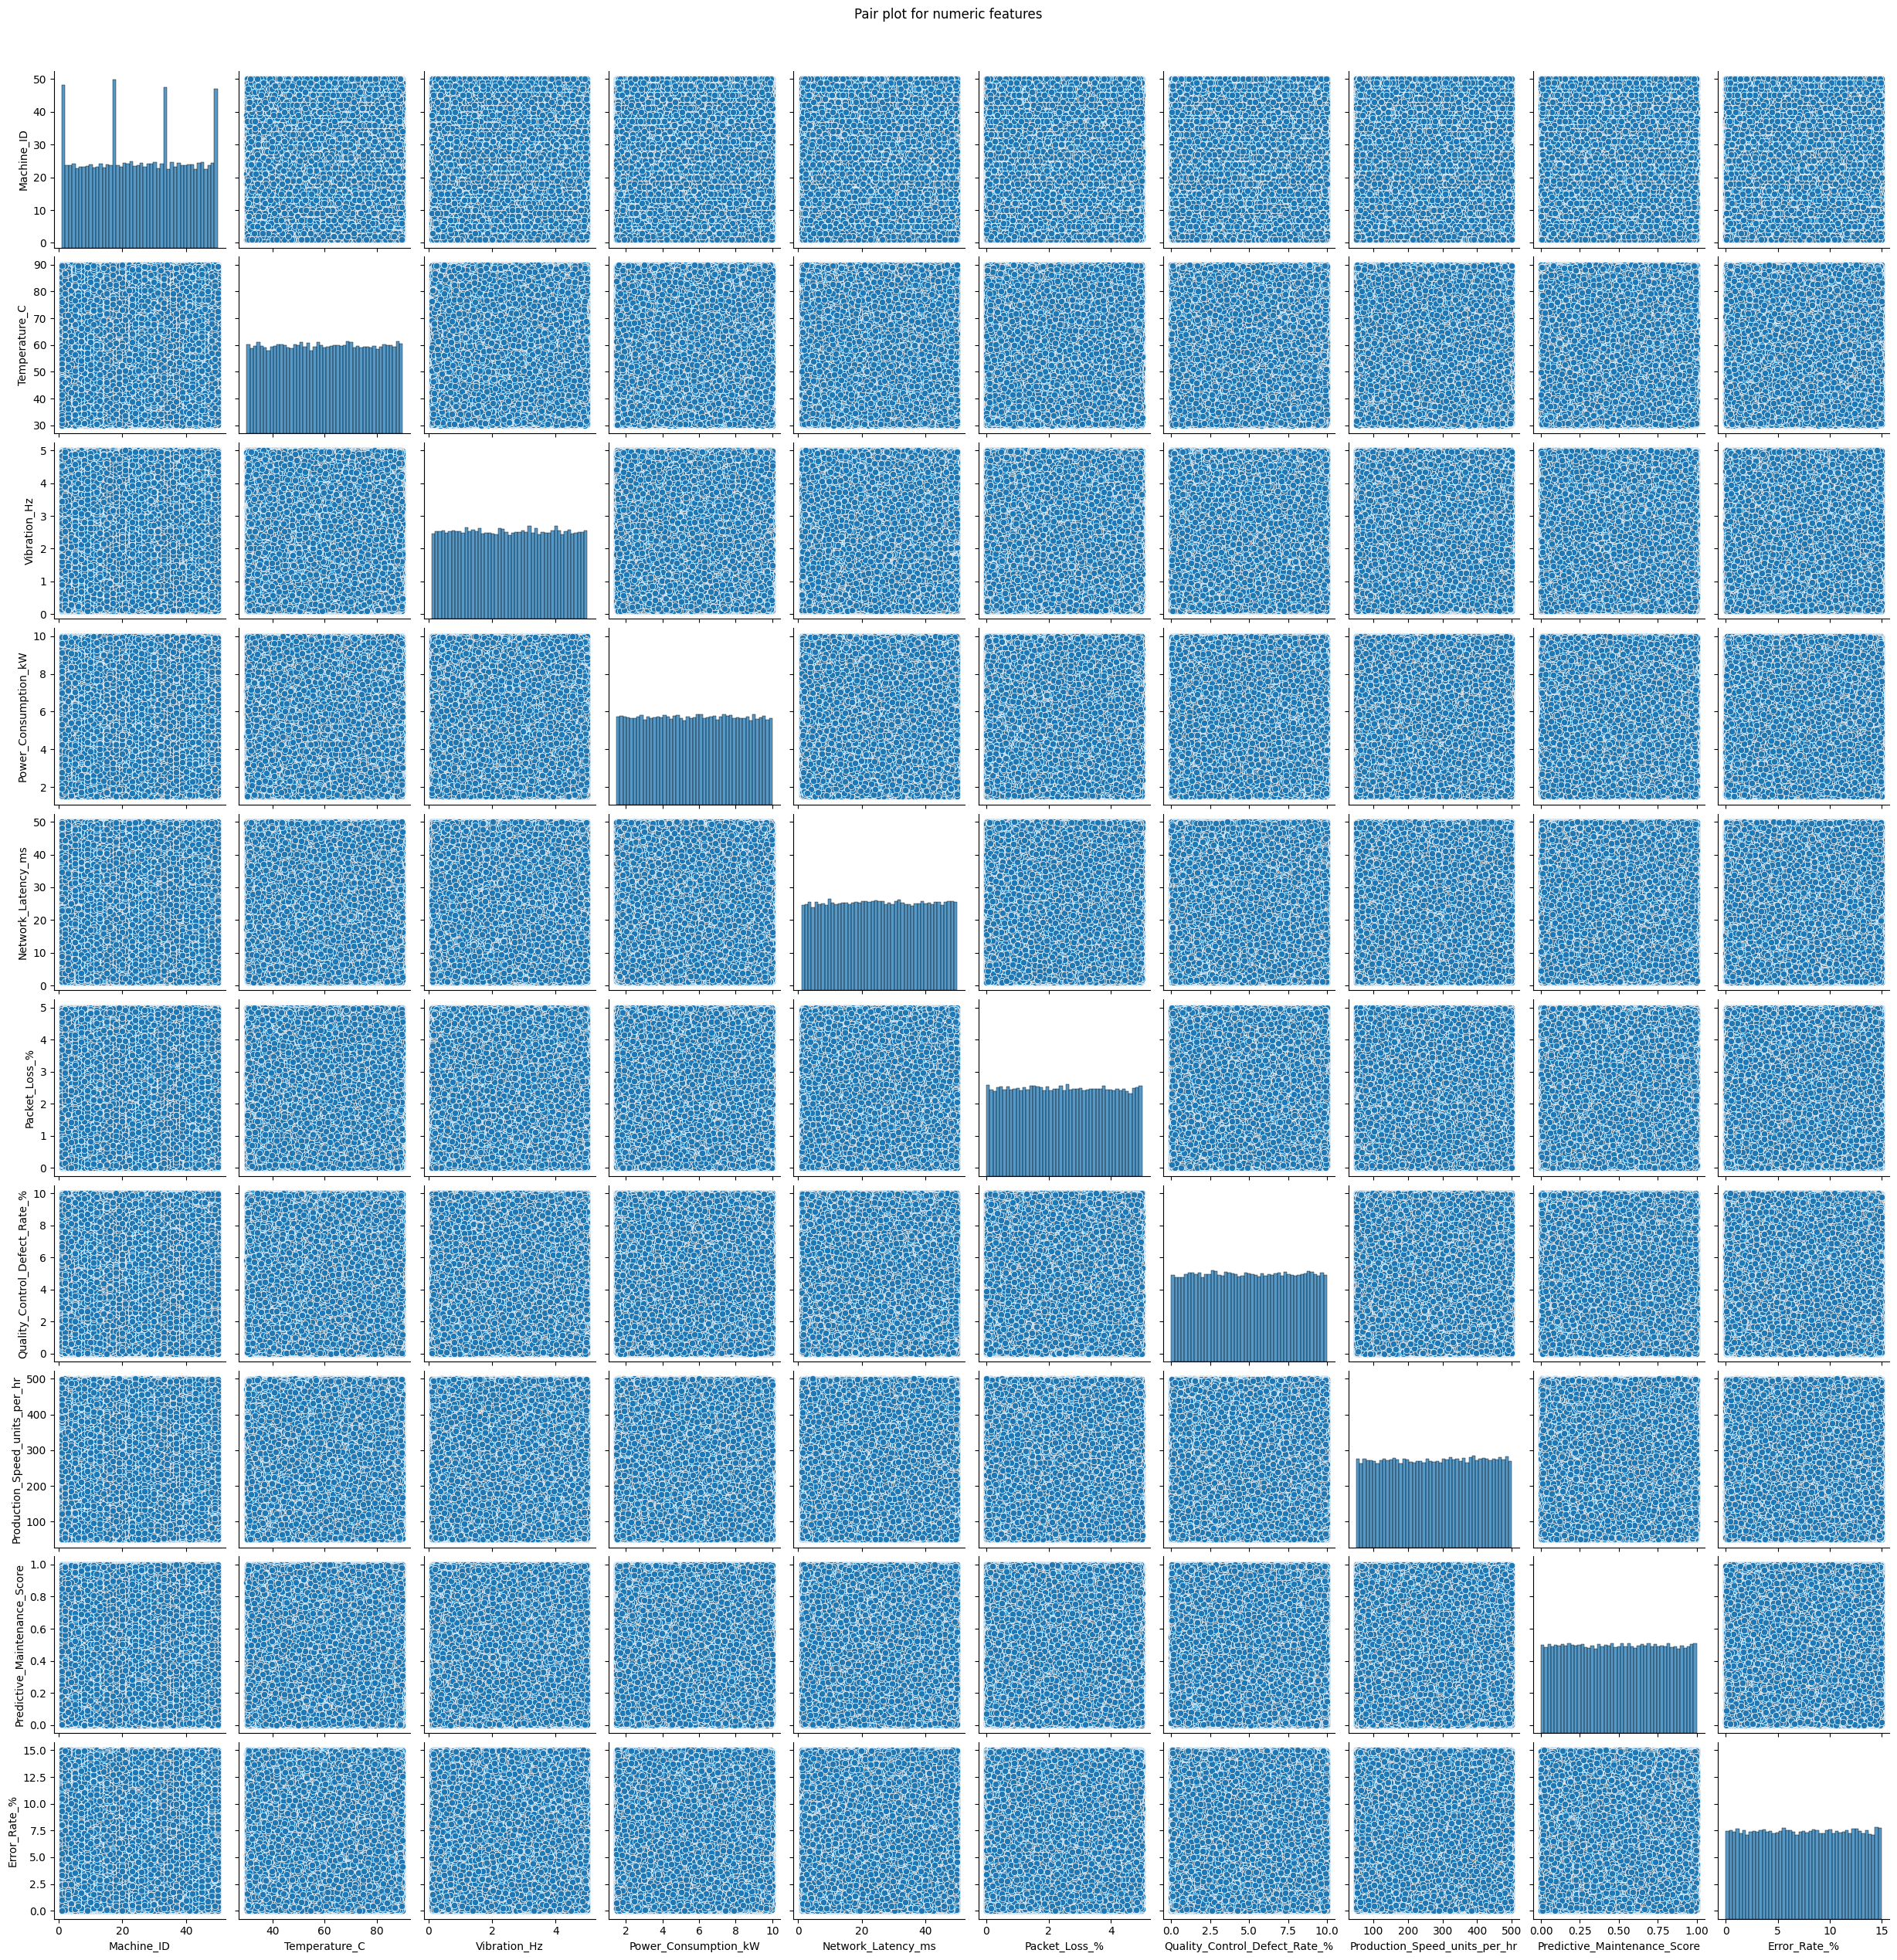

In [21]:
sns.pairplot(df[numeric_cols])
plt.suptitle("Pair plot for numeric features", y=1.02)
plt.show();

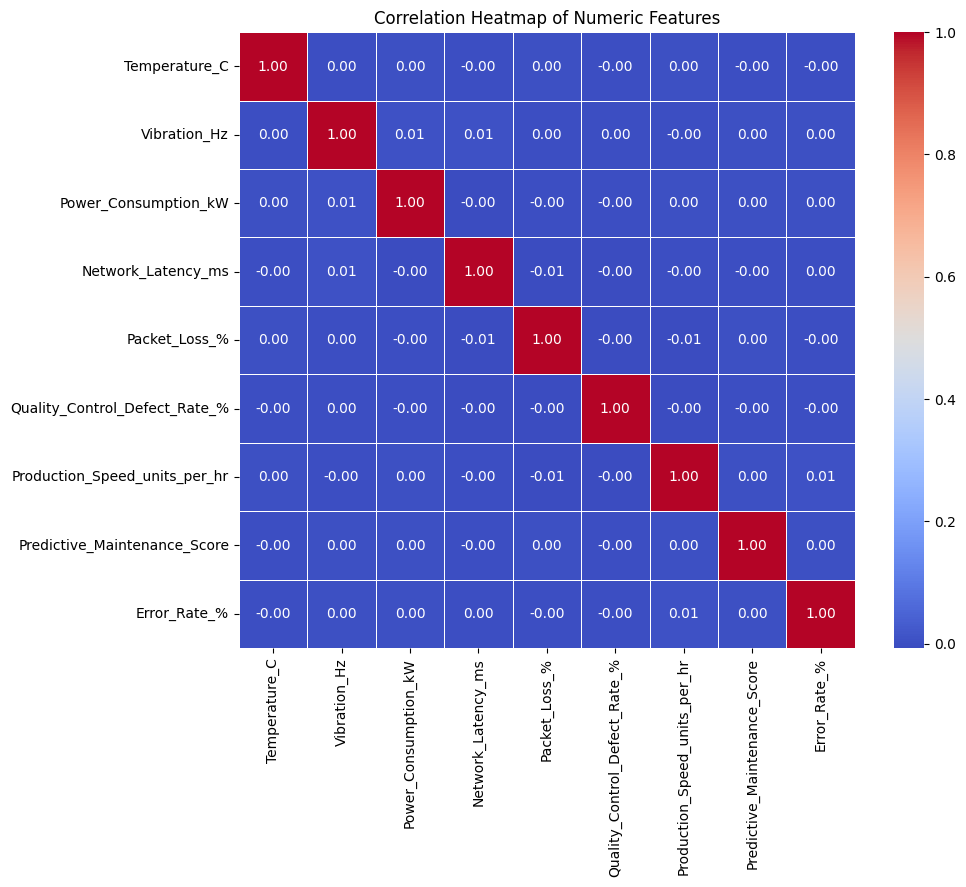

In [22]:
# Filter numeric columns excluding 'Machine_ID'
filtered_numeric = [col for col in numeric_cols if col != 'Machine_ID']

# Compute correlation matrix
corr_matrix = df[filtered_numeric].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Heatmap Shows Only Low Correlations (0, 0.01, -0.0)
This means numeric features are mostly uncorrelated with each other. 
- Correlation heatmaps show linear relationships between features.
- Values near 0 mean no linear correlation.
- ML models desire to have features that aren’t highly correlated (avoids multicollinearity)


Text(0.5, 1.0, 'Efficiency Status countplot ')

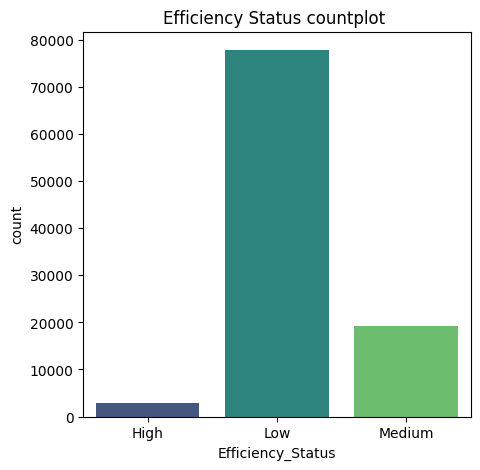

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x='Efficiency_Status', data=df, palette='viridis')
plt.title("Efficiency Status countplot ")

Text(0.5, 1.0, 'Operation Mode countplot ')

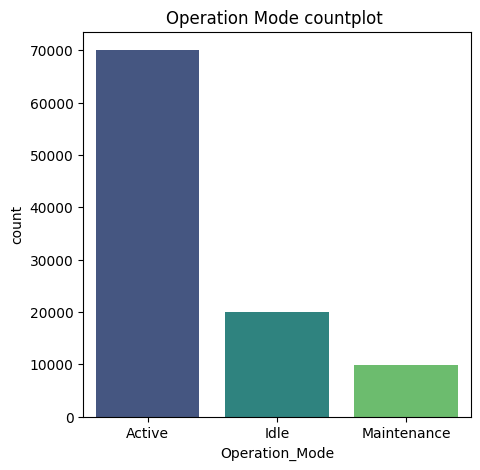

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x='Operation_Mode', data=df, palette='viridis')
plt.title("Operation Mode countplot ")

In [25]:
df["Year"] = df.Timestamp.dt.year

df['Month'] = df.Timestamp.dt.month

df['Day'] = df.Timestamp.dt.day

df['Hour'] = df.Timestamp.dt.hour

In [26]:
df.shape

(100000, 17)

In [27]:
df.sample()

Timestamp  Machine_ID Operation_Mode  Temperature_C  \
36536 2024-01-26 08:56:00          14         Active      86.025513   

       Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
36536      2.667642              5.650865           19.839606       1.346099   

       Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
36536                       0.651446                     188.736616   

       Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  Year  \
36536                      0.381335      8.263051               Low  2024   

       Month  Day  Hour  
36536      1   26     8

In [28]:
df.drop(columns=['Timestamp','Machine_ID'], axis=1, inplace=True)

In [29]:
df.shape

(100000, 15)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder = LabelEncoder()
df['Efficiency_Target'] = label_encoder.fit_transform(df['Efficiency_Status'])

In [32]:
df.Efficiency_Status.value_counts(), df.Efficiency_Target.value_counts()

(Efficiency_Status
 Low       77825
 Medium    19189
 High       2986
 Name: count, dtype: int64,
 Efficiency_Target
 1    77825
 2    19189
 0     2986
 Name: count, dtype: int64)

In [37]:
label_encoder = LabelEncoder()
df['Operation_Mode'] = label_encoder.fit_transform(df['Operation_Mode'])

In [38]:
df.Operation_Mode.value_counts()

Operation_Mode
0    70054
1    20057
2     9889
Name: count, dtype: int64

In [39]:
features =['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%',
       'Year', 'Month', 'Day', 'Hour']

In [40]:
X = df[features]
y = df.Efficiency_Target

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42, stratify=y)

Logistic Regression- As the data is UNIFORM and will deploy on VM Instances


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [57]:
y_pred = clf.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, classification_report

In [59]:
accuracy_score(y_test,y_pred)

0.91655

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       597
           1       0.95      0.96      0.95     15565
           2       0.80      0.76      0.78      3838

    accuracy                           0.92     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.91      0.92      0.92     20000



#### PERMUTATION IMPORTANCE

In [53]:
from sklearn.inspection import permutation_importance

In [61]:
result = permutation_importance(clf, X_test,y_test, n_repeats=10, random_state=42, n_jobs=-1)

In [63]:
importance_df = pd.DataFrame({
    'Feature': features,
    'importances': result.importances_mean
})

In [67]:
importance_df = importance_df.sort_values(by='importances', ascending=False)

In [68]:
importance_df['cum_sum'] = np.cumulative_sum(importance_df['importances'])

In [69]:
importance_df

Feature  importances   cum_sum
9                    Error_Rate_%     0.234895  0.234895
7   Production_Speed_units_per_hr     0.117720  0.352615
4              Network_Latency_ms     0.000235  0.352850
6   Quality_Control_Defect_Rate_%     0.000150  0.353000
3            Power_Consumption_kW     0.000150  0.353150
13                           Hour     0.000145  0.353295
1                   Temperature_C     0.000075  0.353370
8    Predictive_Maintenance_Score     0.000015  0.353385
2                    Vibration_Hz     0.000005  0.353390
10                           Year     0.000000  0.353390
12                            Day    -0.000055  0.353335
5                   Packet_Loss_%    -0.000085  0.353250
0                  Operation_Mode    -0.000180  0.353070
11                          Month    -0.000440  0.352630

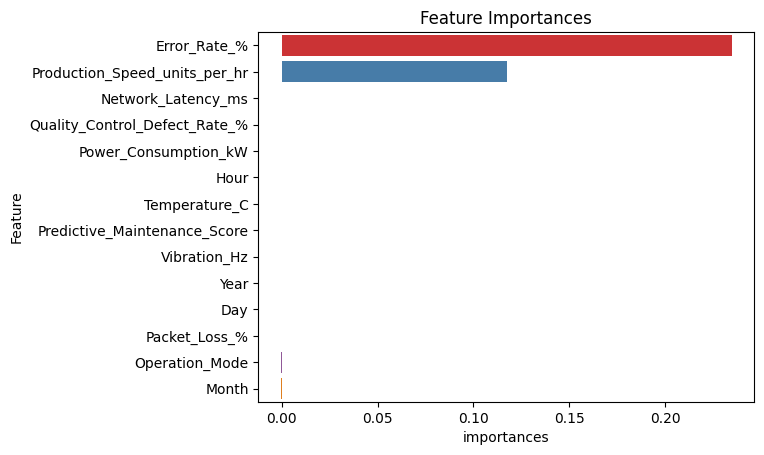

In [71]:
sns.barplot(data=importance_df, x='importances', y='Feature', palette='Set1')
plt.title("Feature Importances")
plt.show()

- Only two features contribute meaningfully:
- Error_Rate_%: 23.5%
- Production_Speed_units_per_hr: 11.8%
- The rest are statistically negligible—most are near zero or even negative, which suggests they may add noise rather than value.
- cumulative importance plateaus at ~35%, meaning the remaining 11 features contribute almost nothing to model performance.


 Select Top Features


In [72]:
selected_features = importance_df[importance_df['importances'] > 0.01]['Feature'].tolist()

In [73]:
X = df[selected_features]
y = df.Efficiency_Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [75]:
y_pred = clf.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred)

0.91665

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       625
           1       0.95      0.96      0.95     15464
           2       0.80      0.76      0.78      3911

    accuracy                           0.92     20000
   macro avg       0.88      0.86      0.87     20000
weighted avg       0.92      0.92      0.92     20000

